In [27]:
!hyperfine -P depth 0 20 "pypy --jit max_unroll_recursion={depth} Day_7/p2.py" --warmup 5 --export-json "res.json"

Benchmark 1: pypy --jit max_unroll_recursion=0 Day_7/p2.py
  Time (mean ± σ):      49.6 ms ±   3.2 ms    [User: 4.5 ms, System: 3.5 ms]
  Range (min … max):    45.4 ms …  60.5 ms    50 runs
 
Benchmark 2: pypy --jit max_unroll_recursion=1 Day_7/p2.py
  Time (mean ± σ):      55.3 ms ±   2.2 ms    [User: 6.7 ms, System: 4.2 ms]
  Range (min … max):    52.0 ms …  61.3 ms    45 runs
 
Benchmark 3: pypy --jit max_unroll_recursion=2 Day_7/p2.py
  Time (mean ± σ):      58.4 ms ±   2.4 ms    [User: 9.6 ms, System: 9.9 ms]
  Range (min … max):    55.1 ms …  66.9 ms    44 runs
 
Benchmark 4: pypy --jit max_unroll_recursion=3 Day_7/p2.py
  Time (mean ± σ):      59.0 ms ±   2.1 ms    [User: 11.1 ms, System: 13.5 ms]
  Range (min … max):    55.2 ms …  63.8 ms    41 runs
 
Benchmark 5: pypy --jit max_unroll_recursion=4 Day_7/p2.py
  Time (mean ± σ):      60.2 ms ±   2.5 ms    [User: 20.2 ms, System: 5.1 ms]
  Range (min … max):    56.8 ms …  68.4 ms    43 runs
 
Benchmark 6: pypy --jit max_unroll_re

In [28]:
import pandas as pd

In [30]:
import json

json_data = json.load(open('res.json'))["results"]

<Axes: title={'center': 'Pypy Recursion Unroll Depth vs Time'}, xlabel='Pypy Recursion Unroll Depth', ylabel='Time (s)'>

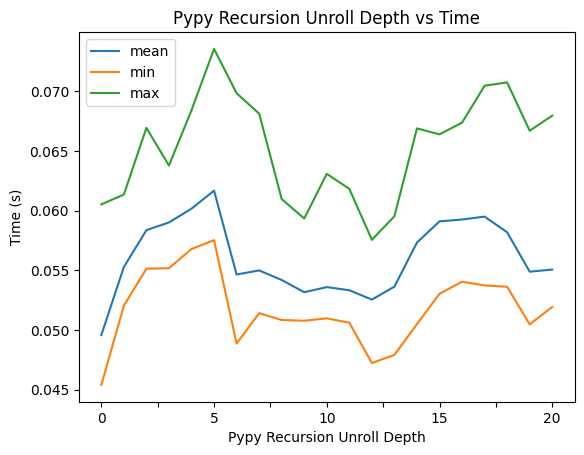

In [31]:
data = pd.DataFrame(json_data).filter(items=["parameters","mean","min","max"])
data["parameters"] = data["parameters"].apply(lambda x: x["depth"])
data.rename(columns={"parameters": "depth"}, inplace=True)
data.plot(x="depth", y=["mean", "min", "max"], kind="line", xlabel="Pypy Recursion Unroll Depth", ylabel="Time (s)", title="Pypy Recursion Unroll Depth vs Time")